In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import pickle
import glob

# Primer punto Preprocesamiento de datos 

In [4]:
train_identity = pd.read_csv("C:/Users/Carlos Vesga/OneDrive - Universidad del Norte/Escritorio/Machine Learning maestria/Fraud Detection/drive-download-20230930T132613Z-001/train_identity.csv")
train_transaction = pd.read_csv("C:/Users/Carlos Vesga/OneDrive - Universidad del Norte/Escritorio/Machine Learning maestria/Fraud Detection/drive-download-20230930T132613Z-001/train_transaction.csv")
data_train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [5]:
Data_VIF = data_train

In [15]:
data_train.shape
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


Se observa que el df resultante tiene 434 columnas y 590.539 filas.

Para tener una primera impresion de nuestros datos usamos la funcion head y describe.

In [16]:
data_train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [17]:
data_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


Vemos que hay muchisimas variables, de las cuales muchas seguramente presentan multicolinealidad, y ademas al observar los valores de los estadisticos vemos que hay varias variables categoricas. 

In [18]:
pd.set_option('display.max_rows', None)
data_train.columns


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

Al ser una base de datos tan extensa tiende a tener muchos valores NaN, para confirmar este pensamiento usamos el siguiente codigo:

In [19]:
print("# NaN values:", data_train.isna().sum().sum())

# NaN values: 115523073


Sabemos que hay mas de 100 millones de valores NaN, ahora queremos saber si esos valores estan distribuidos en todas las columnas o si estan en solo unas cuantas.

In [20]:
train_NA = data_train.isna().sum()
pd.set_option('display.max_rows', 10)
pd.concat([train_NA], axis=1, sort = False, keys = ['Train NA'])

,Train NA
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,449555
id_37,449555
id_38,449555
DeviceType,449730


## Eliminar NaN

Observamos que existen columnas con un porcentaje de faltantes muy altas, para no generar sesgos mas adelante se tomo la desicion de eliminar todas las columnas con un porcentaje de faltantes mayor al 70%, se hace lo mismo para las filas.

In [23]:
p1 = len(data_train)*.70
data_int = data_train.dropna(axis=1,thresh=p1)
p2 = len(data_int.columns)*.70
data_new = data_int.dropna(axis=0,thresh=p2)

Una vez eliminadas las columnas y filas con una tasa de datos faltantes mayor al 70% queremos ver con cuantos datos trabajaremos y que cantidad de faltantes nos quedan.

In [22]:
data_new.shape
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517591 entries, 0 to 590539
Columns: 202 entries, TransactionID to V321
dtypes: float64(193), int64(4), object(5)
memory usage: 801.6+ MB


Se redujo el numero de columnas a la mitad y no se borro ninguna fila.

In [23]:
print("# NaN values:", data_new.isna().sum().sum())

# NaN values: 2786468


Pasamos de mas de 100 millones de datos faltantes a menos de 3 millones.

In [24]:
New_NA = data_new.isna().sum()
pd.set_option('display.max_rows', 15)
pd.concat([New_NA], axis=1, sort = False, keys = ['New NA'])


,New NA
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
V317,9
V318,9
V319,9
V320,9


No observamos nada extraño.

## Crear Dummies

Tenemos 5 columnas categoricas, las cuales transformaremos a dummies, para un correcto analisis de multicolinealidad.

In [25]:
data_new.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 202, dtype: object

Primero encontramos el nombre de las columnas categoricas.

In [26]:
for c in data_new.columns:
    if (data_new[c].dtype == 'O'):
          print(c, data_new[c].dtype)

ProductCD object
card4 object
card6 object
P_emaildomain object
M6 object


In [26]:
vector_objecto = np.array(['ProductCD','card4','card6','P_emaildomain','M6'])
print(vector_objecto)

['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M6']


In [27]:
data_new_dumm = data_new
# Creamos las variables binarias
for c in vector_objecto:
    dummies = pd.get_dummies(data_new_dumm[c], drop_first = True)
    data_new_dumm = pd.concat([data_new_dumm, dummies], axis = 1)
    data_new_dumm = data_new_dumm.drop(columns=[c])



In [29]:
data_new_dumm.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com,T
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,False,False,False,False,False,False,False,False,False,True
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,False,False,False,False,False,False,False,False,False,True
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,False,False,False,False,False,False,False,False,False,False
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,False,False,False,True,False,False,False,False,False,False
5,2987005,0,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,...,False,False,False,False,False,False,False,False,False,True


In [30]:
data_new_dumm.shape

(517591, 266)

### Imputacion de datos faltantes usando la mediana

Sabemos que existen una gran candidad de datos faltantes, los cuales dificultan realizar un EDA apropiado. por lo cual vamos a usar tecnicas de imputacion para rellenar los datos faltantes.

In [28]:
data_new_na = data_new_dumm

La primera parte de este codigo se coloca para evitar que intente imputar las variables dummies.

In [32]:
numerical_cols = data_new_na.select_dtypes(include=['float64', 'int64']).columns

imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_new_na[numerical_cols] = imp.fit_transform(data_new_na[numerical_cols])


In [33]:
print("# NaN values:", data_new_na.isna().sum().sum())

# NaN values: 0


In [34]:
data_new_na.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com,T
0,2987000.0,0.0,86400.0,68.5,13926.0,360.0,150.0,142.0,315.0,87.0,...,False,False,False,False,False,False,False,False,False,True
1,2987001.0,0.0,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,...,False,False,False,False,False,False,False,False,False,True
2,2987002.0,0.0,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,...,False,False,False,False,False,False,False,False,False,False
3,2987003.0,0.0,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,...,False,False,False,True,False,False,False,False,False,False
5,2987005.0,0.0,86510.0,49.0,5937.0,555.0,150.0,226.0,272.0,87.0,...,False,False,False,False,False,False,False,False,False,True


Ya imputamos todos los datos faltantes, y observamos que el indice se desfaso.

In [35]:
data_new_na = data_new_na.reset_index(drop=True)

In [36]:
data_new_na.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com,T
0,2987000.0,0.0,86400.0,68.5,13926.0,360.0,150.0,142.0,315.0,87.0,...,False,False,False,False,False,False,False,False,False,True
1,2987001.0,0.0,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,...,False,False,False,False,False,False,False,False,False,True
2,2987002.0,0.0,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,...,False,False,False,False,False,False,False,False,False,False
3,2987003.0,0.0,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,...,False,False,False,True,False,False,False,False,False,False
4,2987005.0,0.0,86510.0,49.0,5937.0,555.0,150.0,226.0,272.0,87.0,...,False,False,False,False,False,False,False,False,False,True


## Características Fraud Detection

TransactionDT: Intervalo de tiempo a partir de una fecha y hora de referencia

TransactionAMT: Importe del pago de la transacción en USD

ProductCD: Código de producto, el producto de cada transacción

card1 - card6 : Información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco
emisor, país, etc.

addr : Dirección

dist: Distancia

P_ and (R_) emaildomain: Dominio de correo electrónico del comprador y del destinatario

C1-C14 : Recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc. El significado
real está codificado.

D1-D15 : Intervalo de tiempo, como los días transcurridos entre la transacción anterior, etc.

M1-M9 : Coinciden, como los nombres en la tarjeta y la dirección, etc.

Vxxx : Vesta ofrece una gran variedad de funciones, como la clasificación, el recuento y otras relaciones
entre entidades.

DeviceType: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital

DeviceInfo: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital

id_12 - id_38 : Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma
digital

# EDA

In [37]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [38]:
data_new_na.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.175910e+05,517591.000000,5.175910e+05,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,...,517591.00000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000,517591.000000
mean,3.294521e+06,0.032713,7.692834e+06,138.344482,9920.685209,358.367995,153.575335,199.227075,291.109225,86.816461,...,43.57956,23.505904,48.318082,29.628222,121.578130,277.387990,180.718609,17.424295,43.945337,28.477907
std,1.661408e+05,0.177885,4.516176e+06,251.742319,4887.038136,155.288298,11.840988,41.142701,95.729144,2.424789,...,179.13894,100.539429,183.518227,122.911492,2420.989987,4243.326201,2979.848973,263.684781,442.348480,326.839280
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.158992e+06,0.000000,3.713066e+06,42.052000,6019.000000,211.000000,150.000000,166.000000,205.000000,87.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.298306e+06,0.000000,7.753521e+06,67.950000,9692.000000,360.000000,150.000000,226.000000,299.000000,87.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.436618e+06,0.000000,1.146851e+07,117.000000,14181.000000,500.000000,150.000000,226.000000,325.000000,87.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18395.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55125.00000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,90750.000000,90750.000000,90750.000000


In [39]:
data_new_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517591 entries, 0 to 517590
Columns: 266 entries, TransactionID to T
dtypes: bool(69), float64(197)
memory usage: 812.0 MB


Todas las variables son ahora numericas, y al analizar las medias e intervalos se escogen TransactionAMT, card1, card2, card5 para continuar con el analisis. Debido a que presentan distribuciones variadas, a su vez se usara la variable vategorica p_emaildomain.

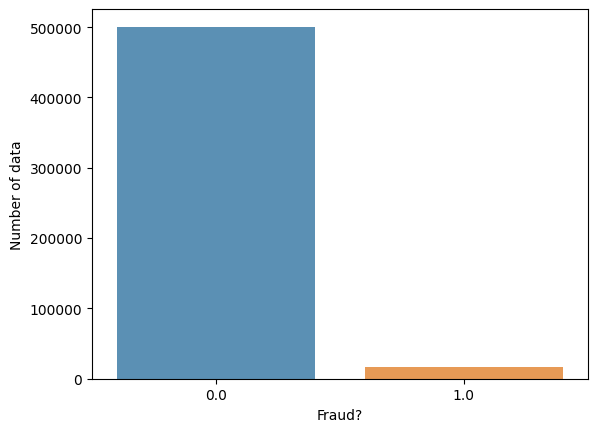

In [40]:
cnt_pro = data_new_na['isFraud'].value_counts()
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of data', fontsize=10)
plt.xlabel('Fraud?', fontsize=10);


Podemos ver que claramente las clases estan fuertemente desbalancedas, lo cual sugiera el uso de OverSampling para evitar que el modelo solo aprenda a detectar cuando no hay fraude.

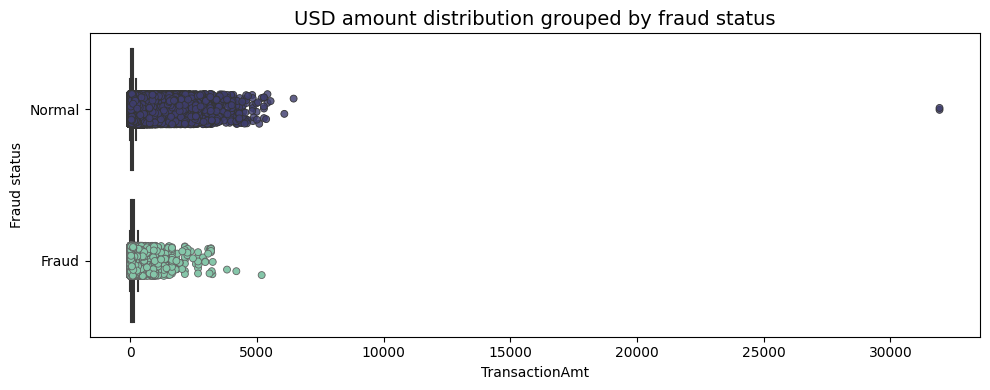

In [41]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionAmt', data = data_new_na, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionAmt', data = data_new_na, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('USD amount distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Vemos que existen dos valores atipicos dificultando la visualizacion, debido a la gran diferencia se decide borrarlos. Dado que estas transacciones son extremadamente raras y no representativas del patrón general observado en el conjunto de datos, su presencia podría introducir ruido y afectar la generalización y precisión de nuestros modelos.

### Borrar valores atipicos

In [42]:
AMT_subset = data_new_na['TransactionAmt']
print(np.where(AMT_subset > 20000))

(array([224369, 224372], dtype=int64),)


In [43]:
data_new_na.head(224373)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com,T
0,2987000.0,0.0,86400.0,68.500,13926.0,360.0,150.0,142.0,315.0,87.0,...,False,False,False,False,False,False,False,False,False,True
1,2987001.0,0.0,86401.0,29.000,2755.0,404.0,150.0,102.0,325.0,87.0,...,False,False,False,False,False,False,False,False,False,True
2,2987002.0,0.0,86469.0,59.000,4663.0,490.0,150.0,166.0,330.0,87.0,...,False,False,False,False,False,False,False,False,False,False
3,2987003.0,0.0,86499.0,50.000,18132.0,567.0,150.0,117.0,476.0,87.0,...,False,False,False,True,False,False,False,False,False,False
4,2987005.0,0.0,86510.0,49.000,5937.0,555.0,150.0,226.0,272.0,87.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224368,3261335.0,0.0,6652325.0,59.000,2114.0,396.0,150.0,224.0,310.0,87.0,...,False,False,False,False,False,False,False,False,False,False
224369,3261336.0,0.0,6652360.0,31937.391,16075.0,514.0,150.0,102.0,205.0,87.0,...,False,False,False,True,False,False,False,False,False,False
224370,3261337.0,1.0,6652372.0,18.609,4504.0,500.0,185.0,219.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False
224371,3261338.0,0.0,6652384.0,67.950,5680.0,161.0,150.0,102.0,123.0,87.0,...,False,False,False,False,False,False,False,False,False,True


In [44]:
data_new_na.drop([224369, 224372], inplace=True)

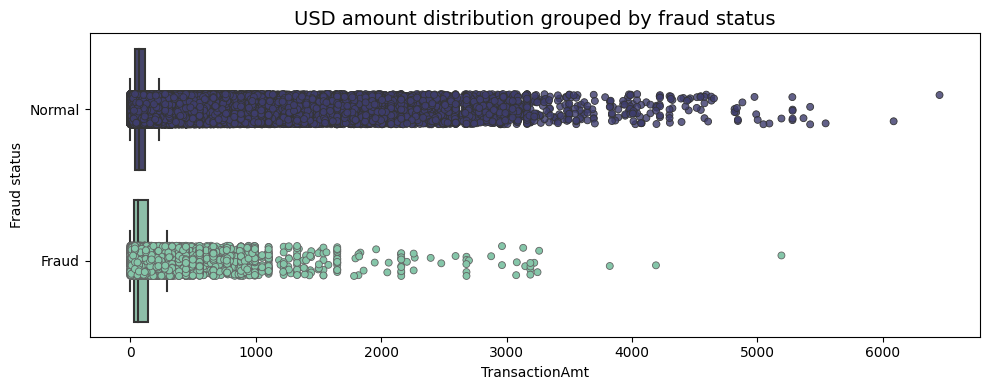

In [45]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionAmt', data = data_new_na, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionAmt', data = data_new_na, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('USD amount distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Tanto la media como el ultimo cuartil son ligeramente superiores para las transciones de fraude.

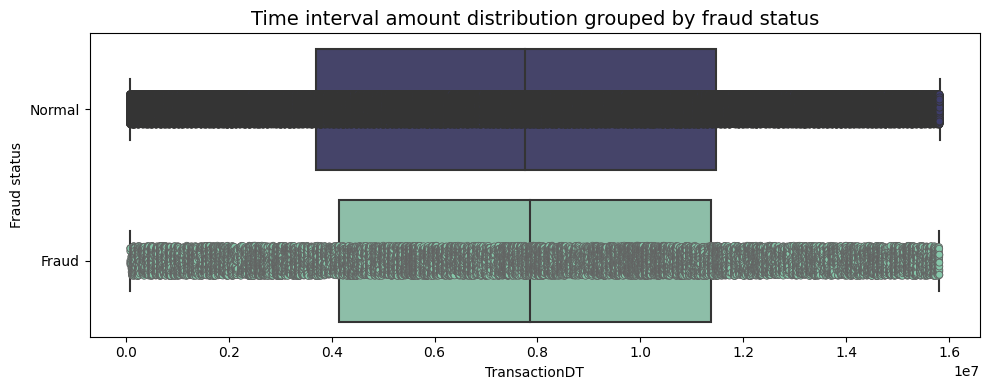

In [46]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionDT', data = data_new_na, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionDT', data = data_new_na, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('Time interval amount distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Parece que los datos se comportan igual.

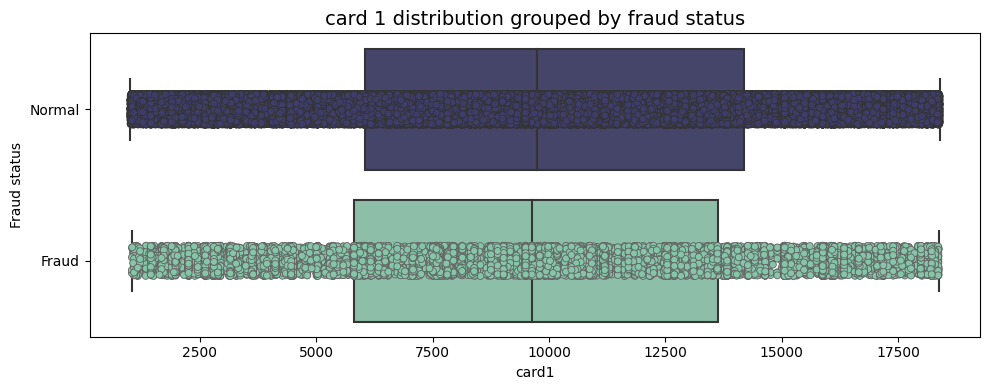

In [47]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'card1', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'card1', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('card 1 distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Las distribucciones son basicamente iguales.

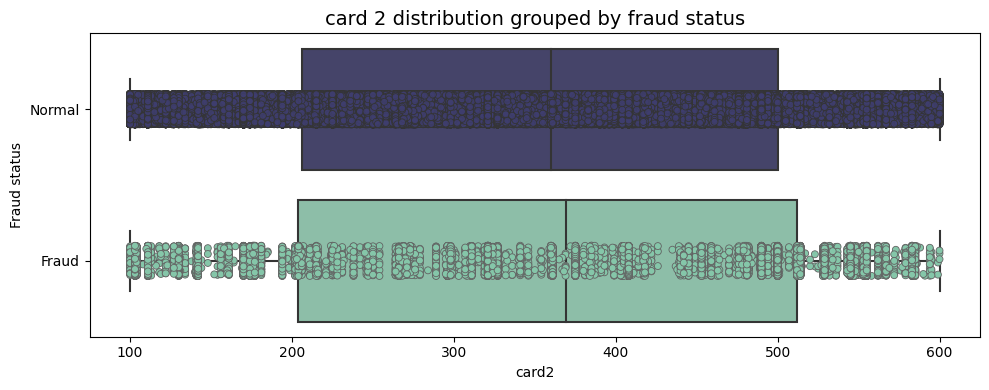

In [48]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'card2', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'card2', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('card 2 distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Los datos de fraude tiene una media ligeramente superior.

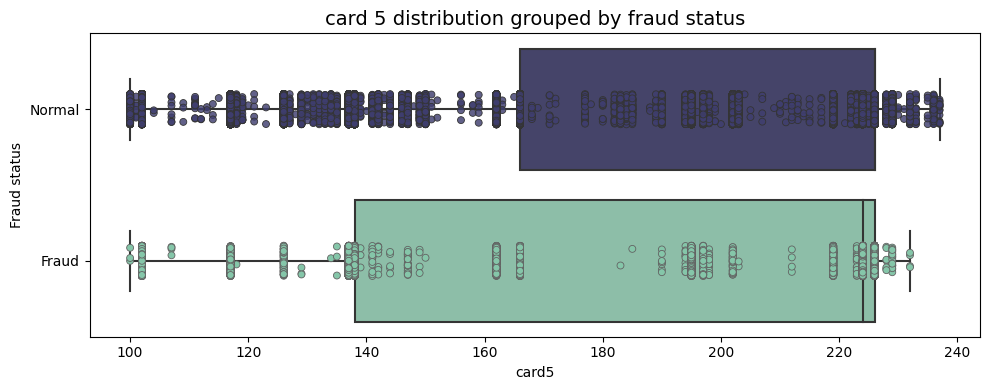

In [49]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'card5', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'card5', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('card 5 distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Los fraudes presentan una variacion mucho menor en esta variable.

In [50]:
labels = (data_new_na['isFraud'].value_counts())
labels

isFraud
0.0    500657
1.0     16932
Name: count, dtype: int64

Comparamos el numero de transacciones fraudulentas y legales por marca de la tarjeta y nos dimos cuenta que el desbanlace de clases dificulta esta parte del EDA.

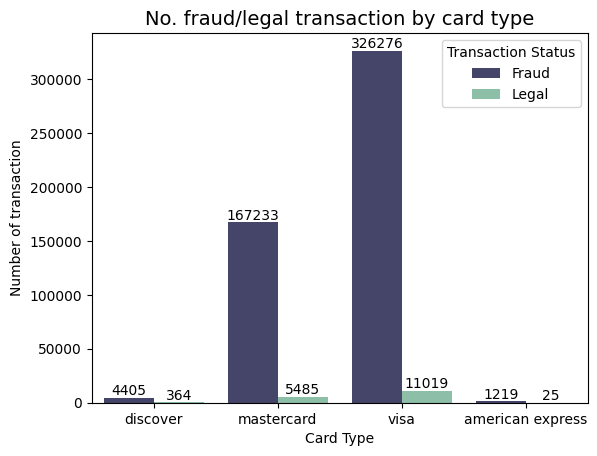

In [51]:
ax = sns.countplot(x = 'card4', hue= 'isFraud', data = data_new, palette=["#3f3e6fd1", "#85c6a9"])
plt.title('No. fraud/legal transaction by card type', fontsize= 14)
plt.xlabel('Card Type')
plt.ylabel('Number of transaction');
plt.legend(title='Transaction Status', labels=['Fraud', 'Legal'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')





Para evitar este problema trabajaremos con porcentajes.

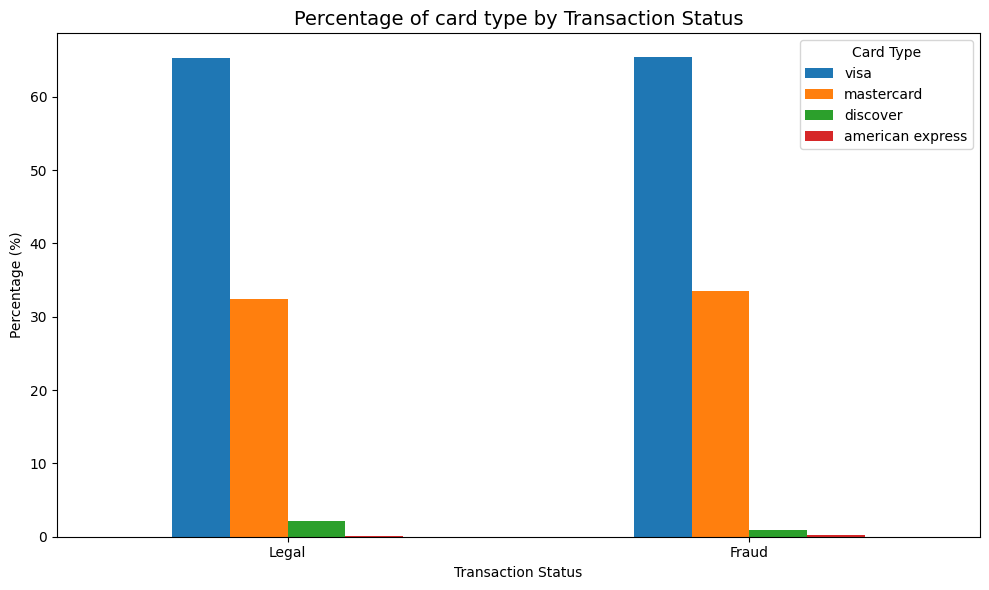

In [52]:
# Calcular el porcentaje de cada tipo de tarjeta dentro de las categorías 'Fraud' y 'Legal'
legal_counts = data_new[data_new['isFraud'] == 0]['card4'].value_counts(normalize=True) * 100
fraud_counts = data_new[data_new['isFraud'] == 1]['card4'].value_counts(normalize=True) * 100

# Construir un DataFrame a partir de estos porcentajes para la visualización
df_percentages = pd.DataFrame({'Legal': legal_counts, 'Fraud': fraud_counts}).fillna(0).transpose()

# Graficar los porcentajes
ax = df_percentages.plot(kind='bar', stacked=False, figsize=(10, 6), color=sns.color_palette("tab10", len(df_percentages.columns)))

# Configurar el gráfico
plt.title('Percentage of card type by Transaction Status', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Transaction Status')
plt.xticks(rotation=0)
plt.legend(title='Card Type')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

No pareceriera que existiera diferencia entre la compañia de la tarjeta de credito y la clase de la transaccion.

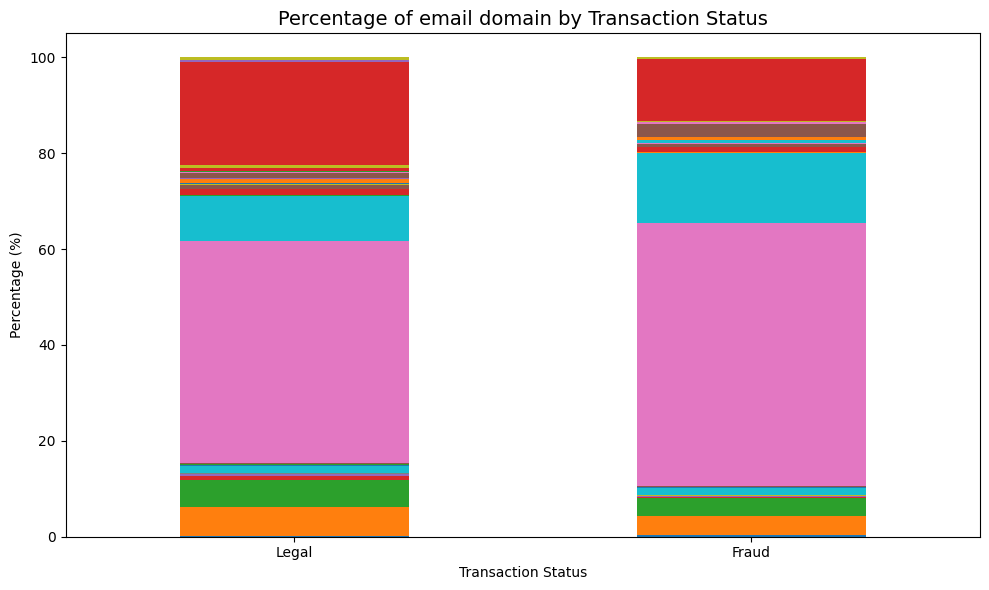

In [53]:
# Calcular el porcentaje de cada tipo de tarjeta dentro de las categorías 'Fraud' y 'Legal'
fraud_counts = data_new[data_new['isFraud'] == 1]['P_emaildomain'].value_counts(normalize=True) * 100
legal_counts = data_new[data_new['isFraud'] == 0]['P_emaildomain'].value_counts(normalize=True) * 100

# Construir un DataFrame a partir de estos porcentajes para la visualización
df_percentages = pd.DataFrame({'Legal': legal_counts, 'Fraud': fraud_counts}).fillna(0).transpose()

# Graficar los porcentajes
ax = df_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("tab10", len(df_percentages.columns)), legend=False)  
# Configurar el gráfico
plt.title('Percentage of email domain by Transaction Status', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Transaction Status')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Observamos algo parecido para el dominio electronico asociado con la tarjeta.

# Reduccion de dimensiones y multicolinealidad

In [14]:
#%pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

Estas formula eliminara el mayor valor de VIF de un conjunto de datos mientras este sea myor que 5, paso seguido recalcula todos los VIF y comienza de nuevo.

In [12]:
def calculate_vif_and_drop(df_numeric):
    while True:
        # Calcular VIF para cada columna
        vif_data = pd.Series([variance_inflation_factor(df_numeric.values, i) 
                              for i in range(df_numeric.shape[1])], 
                             index=df_numeric.columns)
        
        max_vif = vif_data.idxmax()
        max_vif_value = vif_data.max()
        
        if max_vif_value > 5:
            print(f"Eliminando columna '{max_vif}' con VIF={max_vif_value}")
            df_numeric = df_numeric.drop(columns=max_vif)
        else:
            break
    
    return df_numeric


Al usar el dataframe con el que hemos venido trabajando los tiempo del VIF eran demasiado altos, demorando 4 horas para eliminar solo 3 variables, por lo cual se dicidio trabajar con un dataframe menor.

In [8]:
df_reduced = Data_VIF.dropna(axis=1)

In [9]:
X_reduced = df_reduced
X_reduced.drop(columns=['isFraud'])

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2987000,86400,68.50,W,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,2987001,86401,29.00,W,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2987002,86469,59.00,W,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2987003,86499,50.00,W,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,2987004,86506,50.00,H,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,W,6550,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,3577536,15811049,39.50,W,10444,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,3577537,15811079,30.95,W,12037,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,3577538,15811088,117.00,W,7826,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


Separamos el dtaframe en variables numericas y categoricas.

In [10]:
df_numeric = df_reduced.select_dtypes(include=[float, int])
df_non_numeric = df_reduced.select_dtypes(exclude=[float, int])

In [15]:
df_numeric_processed = calculate_vif_and_drop(df_numeric)

Eliminando columna 'C12' con VIF=4211.287267003213
Eliminando columna 'C11' con VIF=1724.5896786572862
Eliminando columna 'C8' con VIF=1264.7903155414592
Eliminando columna 'C4' con VIF=562.3834614337928
Eliminando columna 'C10' con VIF=347.2191161761984
Eliminando columna 'C6' con VIF=269.6379181527176
Eliminando columna 'C1' con VIF=180.93563303465473
Eliminando columna 'C2' con VIF=81.33342925651625
Eliminando columna 'C13' con VIF=36.6219898170708
Eliminando columna 'TransactionID' con VIF=9.522925846336909
Eliminando columna 'C9' con VIF=8.12361376860105


In [16]:
df_combined = pd.concat([df_numeric_processed, df_non_numeric], axis=1)

In [17]:
df_combined.head()

,isFraud,TransactionDT,TransactionAmt,card1,C3,C5,C7,C14,ProductCD
0,0,86400,68.5,13926,0.0,0.0,0.0,1.0,W
1,0,86401,29.0,2755,0.0,0.0,0.0,1.0,W
2,0,86469,59.0,4663,0.0,0.0,0.0,1.0,W
3,0,86499,50.0,18132,0.0,0.0,0.0,1.0,W
4,0,86506,50.0,4497,0.0,0.0,0.0,1.0,H


In [18]:
dummies = pd.get_dummies(df_combined['ProductCD'], drop_first = True)
df_combined = pd.concat([df_combined, dummies], axis = 1)
df_combined= df_combined.drop(columns=['ProductCD'])

In [19]:
df_combined

,isFraud,TransactionDT,TransactionAmt,card1,C3,C5,C7,C14,H,R,S,W
0,0,86400,68.50,13926,0.0,0.0,0.0,1.0,False,False,False,True
1,0,86401,29.00,2755,0.0,0.0,0.0,1.0,False,False,False,True
2,0,86469,59.00,4663,0.0,0.0,0.0,1.0,False,False,False,True
3,0,86499,50.00,18132,0.0,0.0,0.0,1.0,False,False,False,True
4,0,86506,50.00,4497,0.0,0.0,0.0,1.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,0.0,1.0,0.0,2.0,False,False,False,True
590536,0,15811049,39.50,10444,0.0,0.0,0.0,1.0,False,False,False,True
590537,0,15811079,30.95,12037,0.0,1.0,0.0,1.0,False,False,False,True
590538,0,15811088,117.00,7826,0.0,0.0,0.0,1.0,False,False,False,True


# MODELOS DE CLASIFICACION 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import pickle
import glob
from time import process_time
from sklearn.model_selection import train_test_split

In [20]:
X=df_combined.drop(columns=['isFraud'])
y=df_combined['isFraud']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True,random_state=42)

Como se menciono anteriormente se utilizo la tecnica oversampler para suplir el desbalanceo de clases.

In [22]:
oversampler = RandomOverSampler(sampling_strategy='minority')
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

Debido a limites en nuestra capacidad computacional se limita el dataframe a 100000 muestras aleatorias.

In [23]:
sampled_df = pd.concat([x_train_resampled, y_train_resampled], axis=1)
sampled_df = sampled_df.sample(n=100000, random_state=42)

In [24]:
sampled_X = sampled_df.drop(columns=['isFraud'])
sampled_y = sampled_df['isFraud']

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Utilizamos un pipeline para evitar cualquier tipo de dataleak.

In [85]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", knn)])

Hacemos un grid search para hiperparametrizacion de parametros.

In [86]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11]
}


Usamos la libreria pickle para guardar el modelo resultante en formato pkl y evitar tener que correr varias veces cada modelo.

In [87]:
grid_knn = None

if (len(glob.glob("grid_knn_fraud.pkl")) != 0):
    grid_knn = pickle.load(open('grid_knn_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_knn = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_knn.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time_fraud.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_knn, open('grid_knn_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_knn.best_score_)
print("Best parameters:\n{}".format(grid_knn.best_params_))

Best CV score = 0.908:
Best parameters:
{'knn__n_neighbors': 3}


Despues de encontrar el mejor modelo lo ponemos a prueba con el testing y guardamos las metricas de error.

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_knn = grid_knn.predict(x_test)

# Calcular métricas
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

In [31]:
knn_accuracy

0.7785145798760457

### Matriz de confusion

Una matriz de confusión es una herramienta que permite la visualización del rendimiento de un algoritmo de clasificación. Está organizada en forma de una tabla de dos dimensiones, donde las filas representan las clases reales y las columnas las clases predichas. Los principales componentes de esta matriz son:

Verdaderos Positivos (VP): Casos en los que el modelo predijo positivo y la realidad es positiva.

Verdaderos Negativos (VN): Casos en los que el modelo predijo negativo y la realidad es negativa.

Falsos Positivos (FP): Casos en los que el modelo predijo positivo pero la realidad es negativa.

Falsos Negativos (FN): Casos en los que el modelo predijo negativo pero la realidad es positiva.

In [89]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
   
    matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title('Matriz de Confusión')
    plt.show()

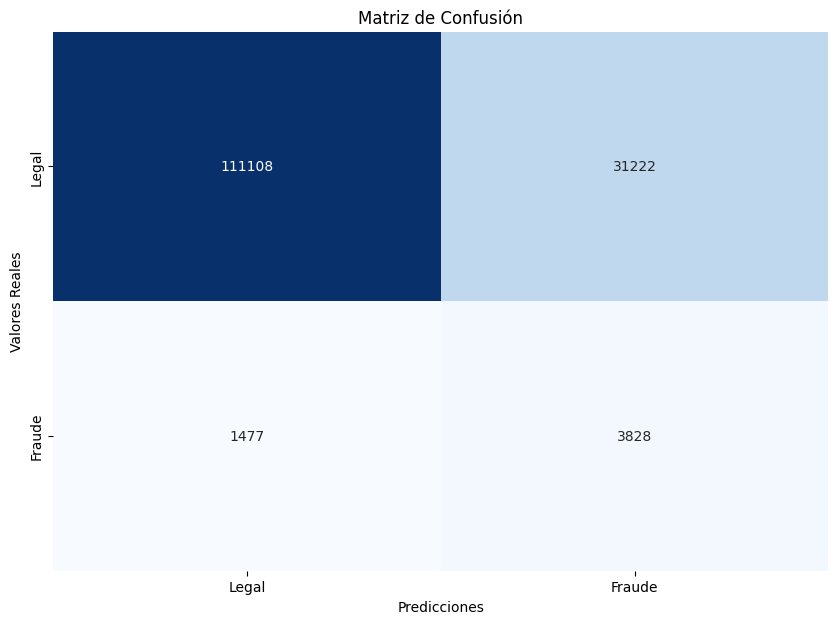

In [91]:
y_true = y_test
y_pred = y_pred_knn
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que permite evaluar la capacidad discriminativa de un modelo de clasificación binario en función de diferentes umbrales de clasificación. La curva se genera trazando la tasa de verdaderos positivos (sensibilidad) contra la tasa de falsos positivos (1-especificidad) para diferentes umbrales de decisión.

El área bajo la curva ROC (AUC) es una métrica cuantitativa que indica el rendimiento global del modelo: un valor de AUC de 1.0 indica una clasificación perfecta, mientras que un valor de 0.5 sugiere que el modelo no tiene capacidad discriminativa (similar a una clasificación aleatoria).

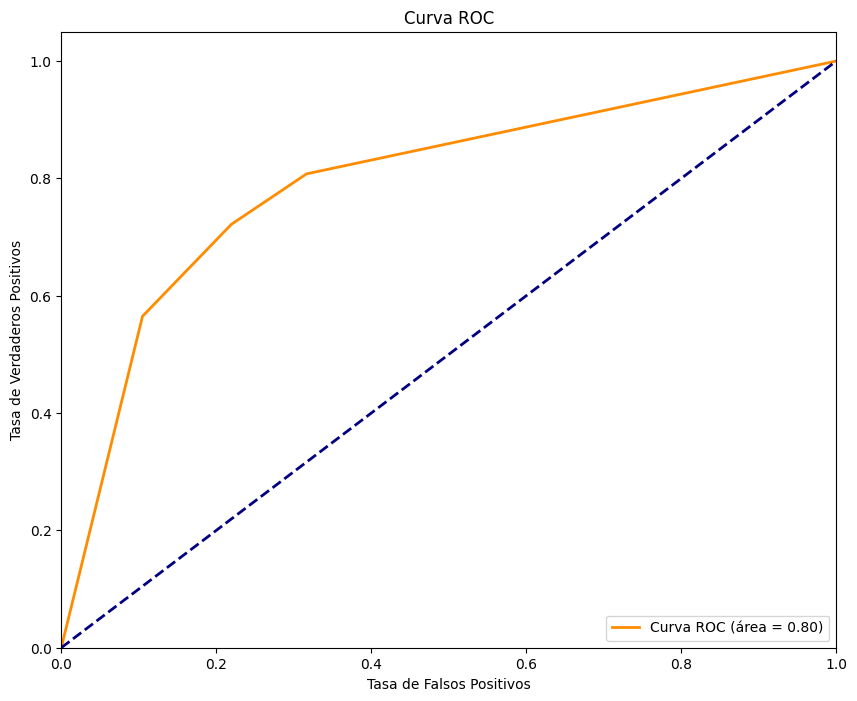

In [102]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de las clases para KNN
y_prob_knn = grid_knn.predict_proba(x_test)[:, 1]

# Calcular los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Lasso

In [98]:
from sklearn.linear_model import LogisticRegression

lasso_classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)

pipe = Pipeline([("scaler", MinMaxScaler()), ("lasso_classifier", lasso_classifier)])

param_grid = {
    'lasso_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_lasso = None

if (len(glob.glob("grid_lasso_fraud.pkl")) != 0):
    grid_lasso = pickle.load(open('grid_lasso_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_lasso = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_lasso.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time_fraud_lasso.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_lasso, open('grid_lasso_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_lasso.best_score_)
print("Best parameters:\n{}".format(grid_lasso.best_params_))


GridSearchCV CPU time: 4.828125 minutes
Best CV score = 0.718:
Best parameters:
{'lasso_classifier__C': 100}


In [99]:
y_pred_lasso = grid_lasso.predict(x_test)

lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
lasso_precision = precision_score(y_test, y_pred_lasso)
lasso_recall = recall_score(y_test, y_pred_lasso)
lasso_auc = roc_auc_score(y_test, y_pred_lasso)
lasso_f1 = f1_score(y_test, y_pred_lasso)


### Matriz de confusion

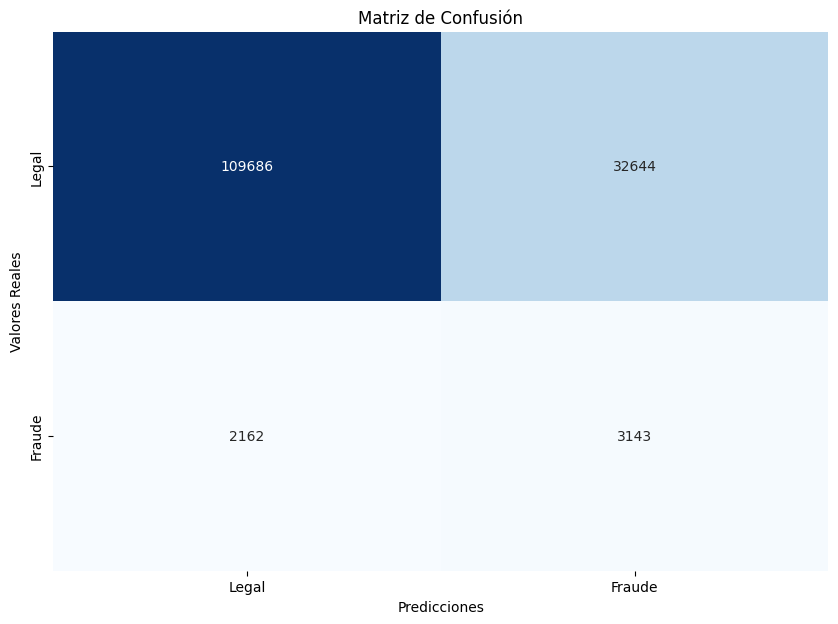

In [100]:
y_true = y_test
y_pred = y_pred_lasso
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

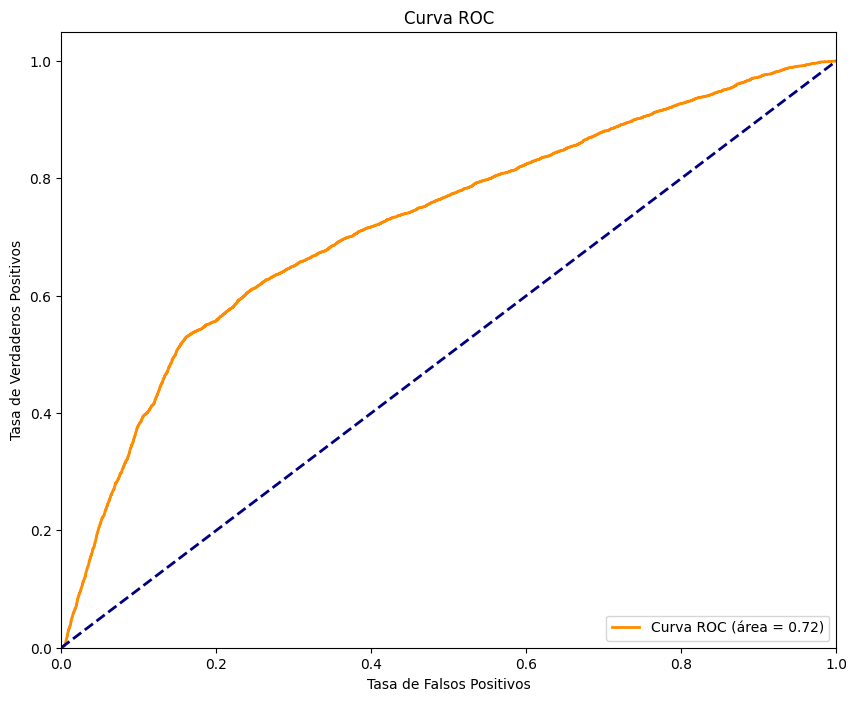

In [105]:
y_prob_lasso = grid_lasso.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lasso)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Ridge

In [103]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import pickle
import glob
from time import process_time

# Crear el pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("ridge", RidgeClassifier())])

# Parámetros para la búsqueda
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
grid_ridge = None

if (len(glob.glob("grid_ridge_fraud.pkl")) != 0):
    grid_ridge = pickle.load(open('grid_ridge_fraud.pkl', 'rb'))
else:
    time_start = process_time()
    grid_ridge = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_ridge.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time)
    with open('cpu_time_fraud.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_ridge, open('grid_ridge_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_ridge.best_score_)
print("Best parameters:\n{}".format(grid_ridge.best_params_))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predicciones para Ridge
y_pred_ridge = grid_ridge.predict(x_test)

# Calcular métricas
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
ridge_precision = precision_score(y_test, y_pred_ridge)
ridge_recall = recall_score(y_test, y_pred_ridge)
ridge_auc = roc_auc_score(y_test, y_pred_ridge)
ridge_f1 = f1_score(y_test, y_pred_ridge)


GridSearchCV CPU time: 0.22499999999999998 minutes
Best CV score = 0.716:
Best parameters:
{'ridge__alpha': 0.01}


### Matriz de confusion

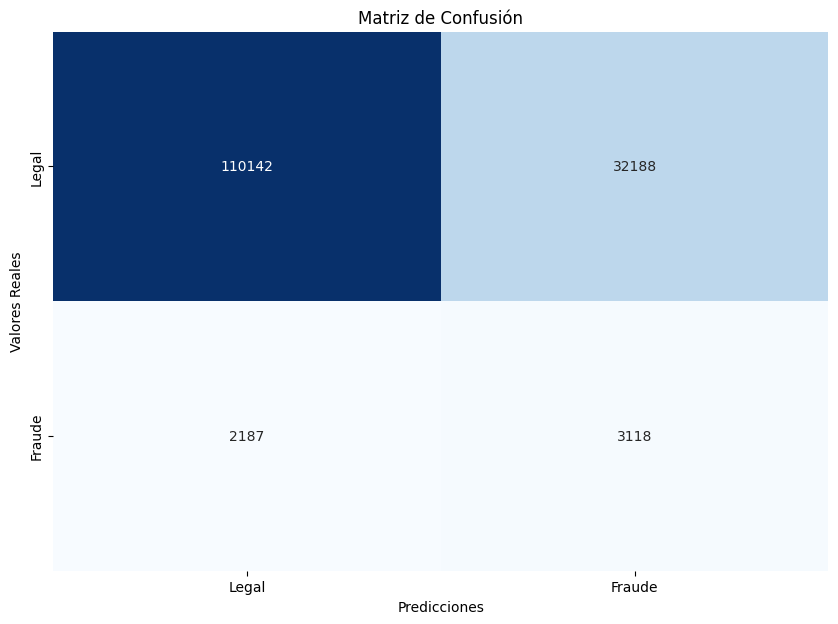

In [104]:
y_true = y_test
y_pred = y_pred_ridge
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

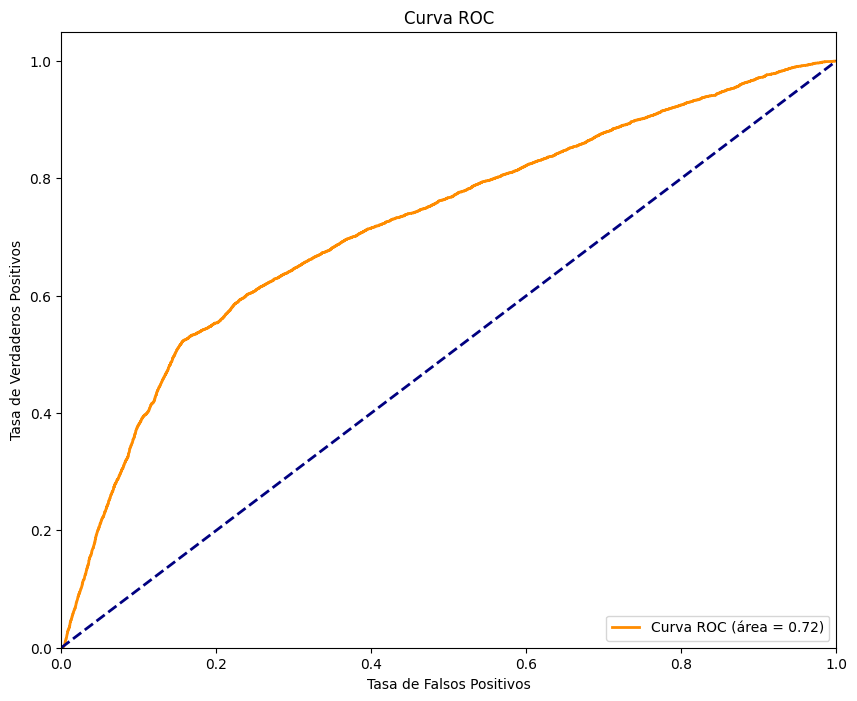

In [107]:
y_prob_ridge = grid_ridge.decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_ridge)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Naive bayes 

In [32]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [33]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("clf", clf)])

In [34]:
GauNB = pipe.fit(sampled_X, sampled_y)

In [35]:
y_pred_clf = GauNB.predict(x_test)

# Calcular métricas
clf_accuracy = accuracy_score(y_test, y_pred_clf)
clf_precision = precision_score(y_test, y_pred_clf)
clf_recall = recall_score(y_test, y_pred_clf)
clf_auc = roc_auc_score(y_test, y_pred_clf)
clf_f1 = f1_score(y_test, y_pred_clf)

### Matriz de confusion

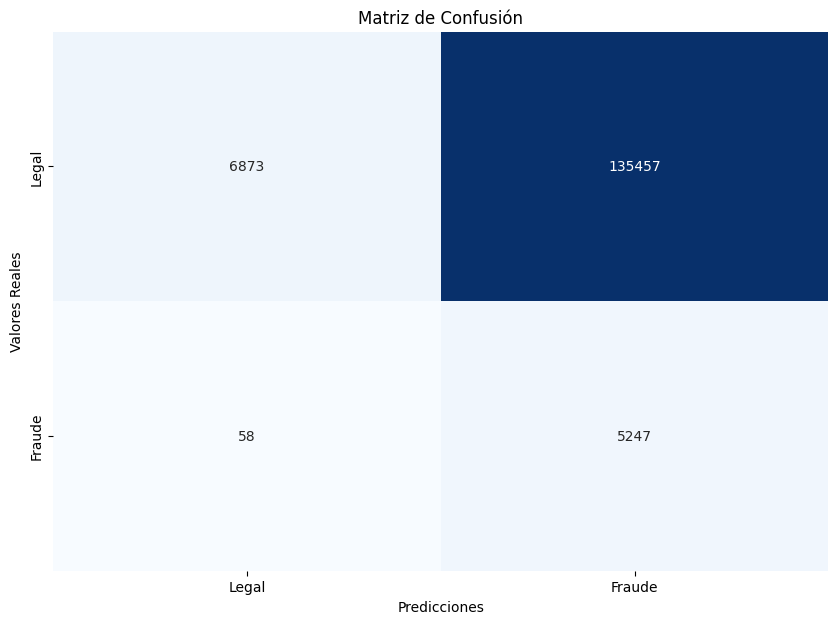

In [92]:
y_true = y_test
y_pred = y_pred_clf
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

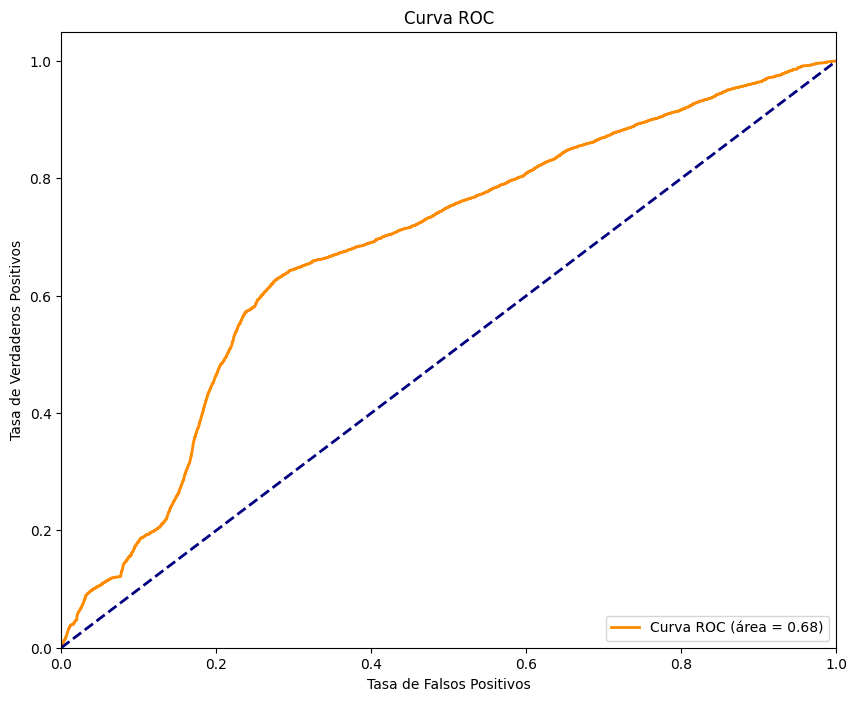

In [108]:
y_prob_gaussian = GauNB.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_gaussian)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## decision tree 

In [46]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'dt__max_depth': [5, 10],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [1, 2, 4],
}

decision_tree = DecisionTreeClassifier()

In [47]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("dt", decision_tree)])

In [48]:
grid_dt_fraud = None

if (len(glob.glob("grid_dt_fraud.pkl")) != 0):
    grid_dt_fraud = pickle.load(open('grid_dt_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_dt_fraud = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_dt_fraud.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_dt_fraud, open('grid_dt_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_dt_fraud.best_score_)
print("Best parameters:\n{}".format(grid_dt_fraud.best_params_))

GridSearchCV CPU time: 0.84375 minutes
Best CV score = 0.842:
Best parameters:
{'dt__max_depth': 10, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}


In [58]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_dt = grid_dt_fraud.predict(x_test)

# Calcular métricas
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

### Matriz de confusion

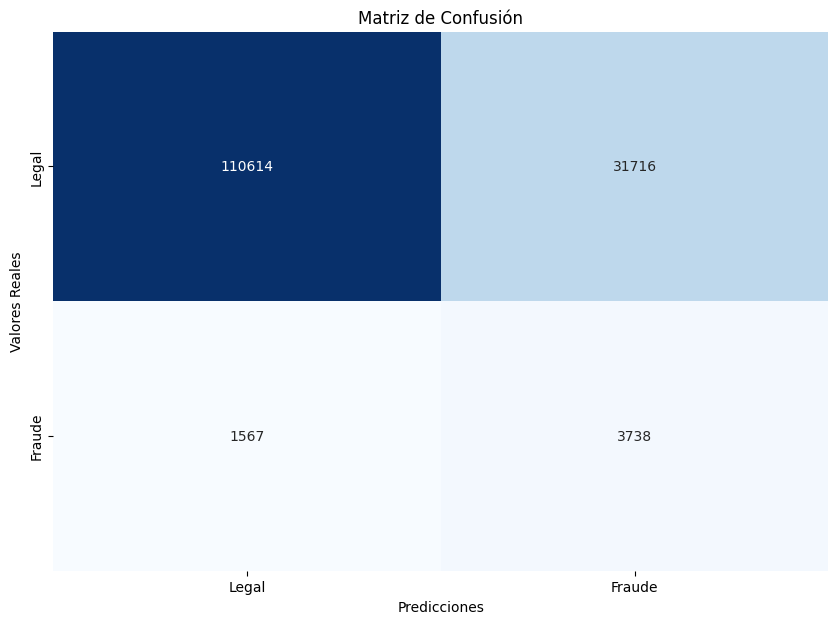

In [93]:
y_true = y_test
y_pred = y_pred_dt
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

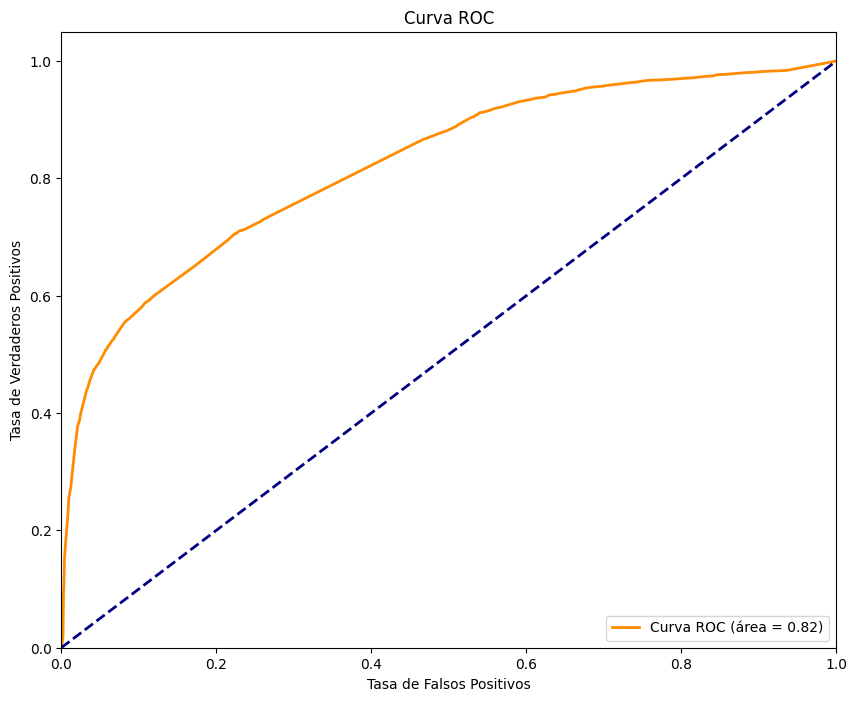

In [109]:
y_prob_dt = grid_dt_fraud.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## random forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Definir los posibles valores para los parámetros de Random Forest
param_grid = {
    'rf__max_depth': [3, 5],
    'rf__ccp_alpha': [0.0, 0.01]
}

random_forest = RandomForestClassifier(random_state=42)

In [40]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", random_forest)])

In [38]:
grid_rf_fraud = None

if (len(glob.glob("grid_rf_fraud.pkl")) != 0):
    grid_rf_fraud = pickle.load(open('grid_rf_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_rf_fraud = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_rf_fraud.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time_rf.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_rf_fraud, open('grid_rf_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_rf_fraud.best_score_)
print("Best parameters:\n{}".format(grid_rf_fraud.best_params_))

GridSearchCV CPU time: 0.759375 minutes
Best CV score = 0.842:
Best parameters:
{'dt__max_depth': 10, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}


In [50]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_rf = grid_rf_fraud.predict(x_test)

# Calcular métricas
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

### Matriz de confusion

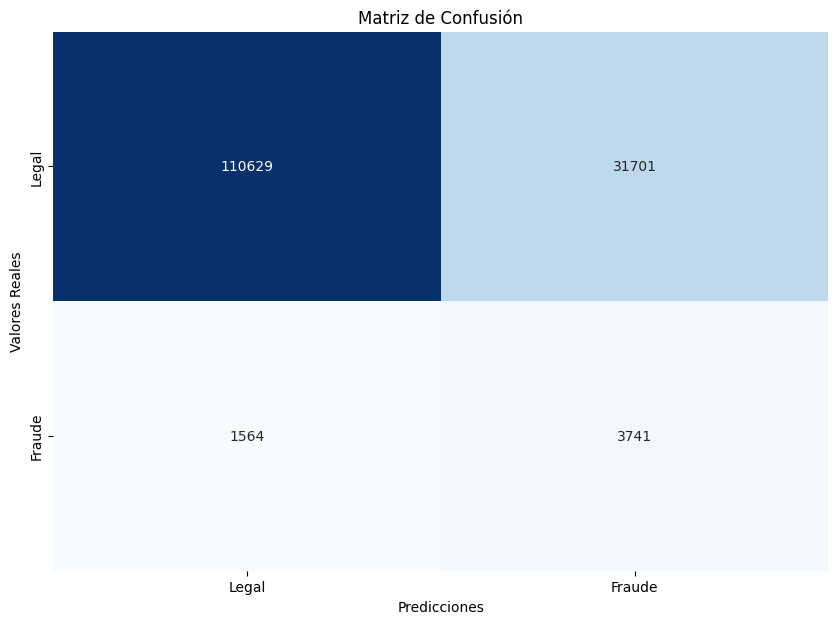

In [94]:
y_true = y_test
y_pred = y_pred_rf
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

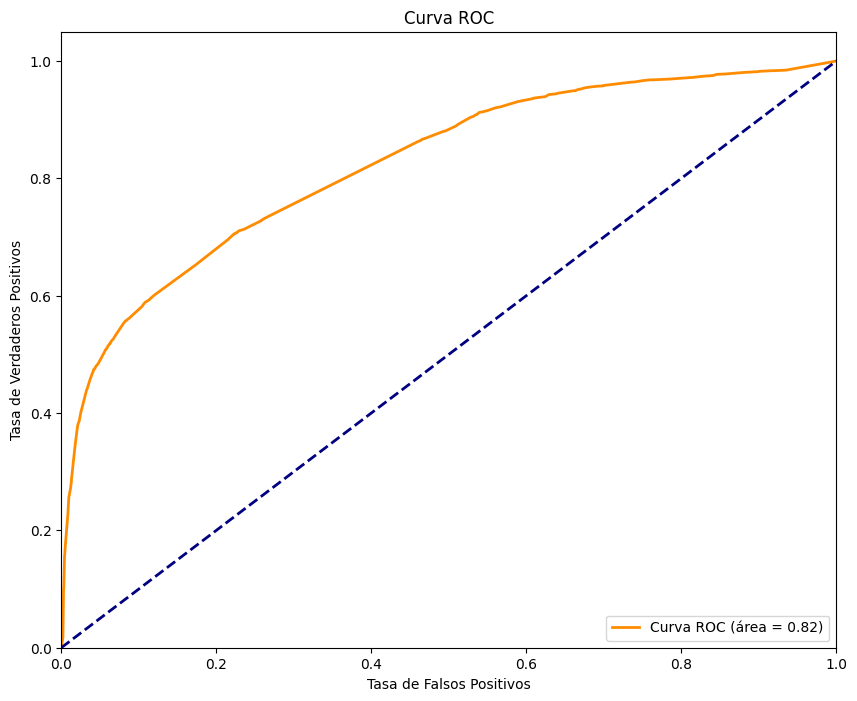

In [110]:
y_prob_rf= grid_rf_fraud.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## XGboost 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir los posibles valores para los parámetros de XGBoost
param_grid = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1],
}

# Crear un clasificador XGBoost
xgb_classifier = GradientBoostingClassifier(random_state=42)


In [42]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("xgb", xgb_classifier)])

In [45]:
grid_xgb_fraud = None

if (len(glob.glob("grid_xgb_fraud.pkl")) != 0):
    grid_xgb_fraud = pickle.load(open('grid_xgb_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_xgb_fraud = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_xgb_fraud.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_xgb_fraud, open('grid_xgb_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_xgb_fraud.best_score_)
print("Best parameters:\n{}".format(grid_xgb_fraud.best_params_))

GridSearchCV CPU time: 8.165625 minutes
Best CV score = 0.830:
Best parameters:
{'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100}


In [51]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_xgb = grid_xgb_fraud.predict(x_test)

# Calcular métricas
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

### Matriz de confusion

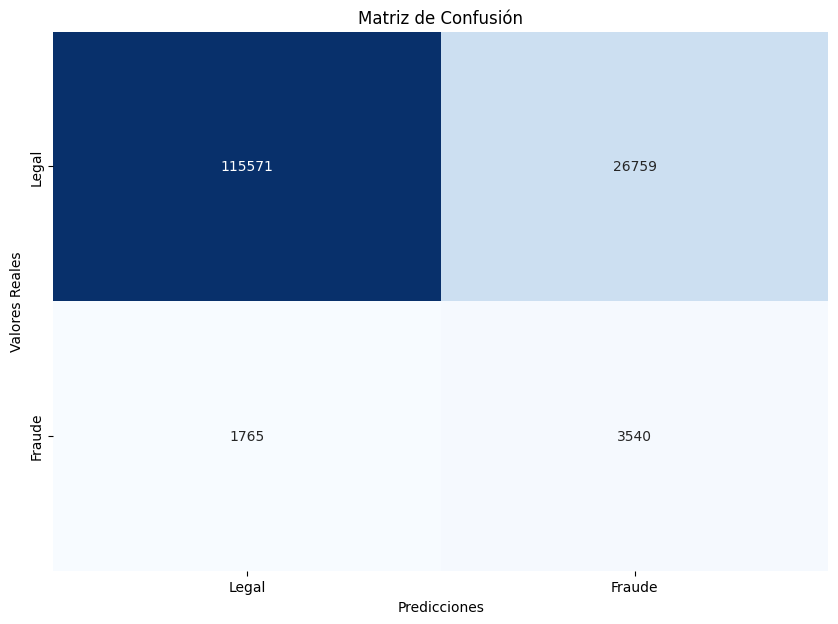

In [95]:
y_true = y_test
y_pred = y_pred_xgb
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

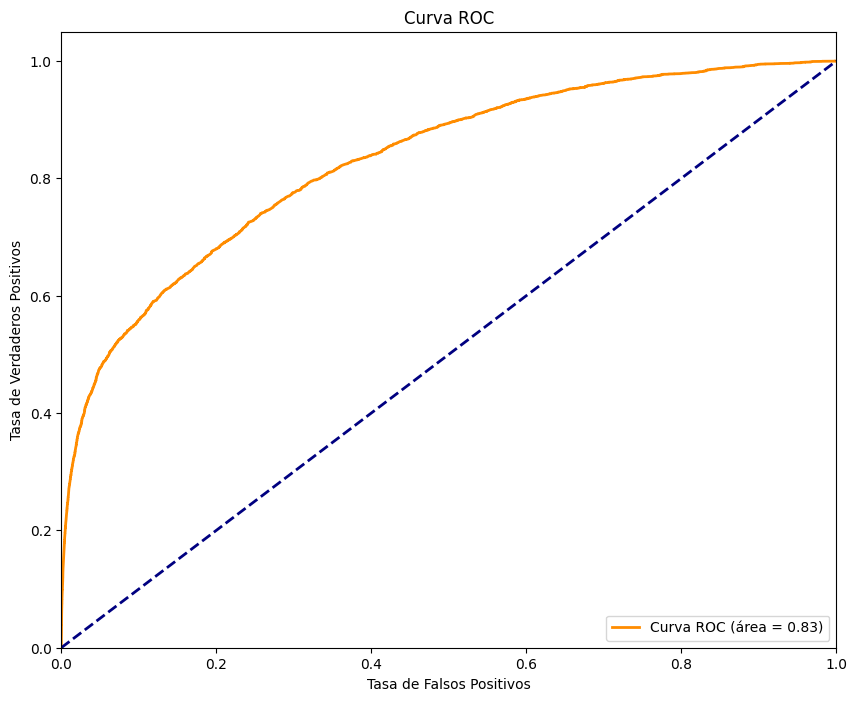

In [111]:
y_prob_xgb = grid_xgb_fraud.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## SVM 

In [115]:
from sklearn.svm import SVC

# Definir los posibles valores para los parámetros de SVM
param_grid = {
    'svm__kernel': ['sigmoid'],
    'svm__C': [0.1, 1],
    'svm__gamma': [0.1, 1],
}

# Crear un clasificador SVM para clasificación
svm_classifier = SVC(random_state=42)

In [116]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", svm_classifier)])

In [3]:
grid_svm_fraud = None

if (len(glob.glob("grid_svm_fraud.pkl")) != 0):
    grid_svm_fraud = pickle.load(open('grid_svm_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_svm_fraud = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_svm_fraud.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_svm_fraud, open('grid_svm_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_svm_fraud.best_score_)
print("Best parameters:\n{}".format(grid_svm_fraud.best_params_))

Best CV score = 0.688:
Best parameters:
{'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'sigmoid'}


In [67]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_svm = grid_svm_fraud.predict(x_test)

# Calcular métricas
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

### Matriz de confusion

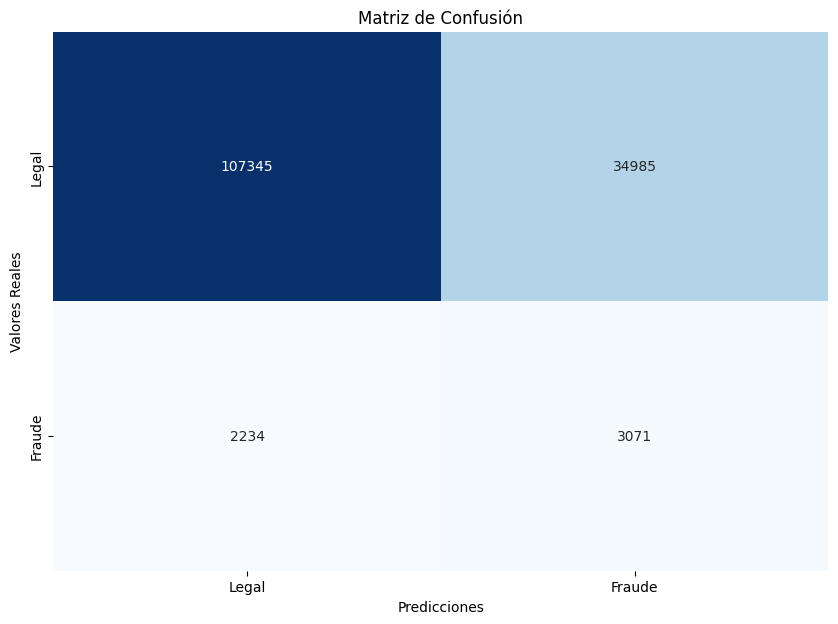

In [96]:
y_true = y_test
y_pred = y_pred_svm
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

In [ ]:
y_prob_svm = grid_svm_fraud.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## MLP 

In [68]:
from sklearn.neural_network import MLPClassifier

param_grid = {'mlp__alpha': [0.1, 0.01, 0.001],
              'mlp__hidden_layer_sizes': [(10,), (100,), (1000,)],
              'mlp__activation': ['logistic'],
              'mlp__learning_rate': ['constant']}

mlp=MLPClassifier(max_iter=10000, random_state=42)

In [69]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("mlp", mlp)])

In [70]:
grid_mlp_fraud = None

if (len(glob.glob("grid_mlp_fraud.pkl")) != 0):
    grid_mlp_fraud = pickle.load(open('grid_mlp_fraud.pkl','rb'))
else:
    time_start = process_time()
    grid_mlp_fraud = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_mlp_fraud.fit(sampled_X, sampled_y)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_mlp_fraud, open('grid_mlp_fraud.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_mlp_fraud.best_score_)
print("Best parameters:\n{}".format(grid_mlp_fraud.best_params_))

GridSearchCV CPU time: 13.846874999999999 minutes
Best CV score = 0.749:
Best parameters:
{'mlp__activation': 'logistic', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate': 'constant'}


In [71]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_mlp = grid_mlp_fraud.predict(x_test)

# Calcular métricas
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_auc = roc_auc_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)

### Matriz de confusion

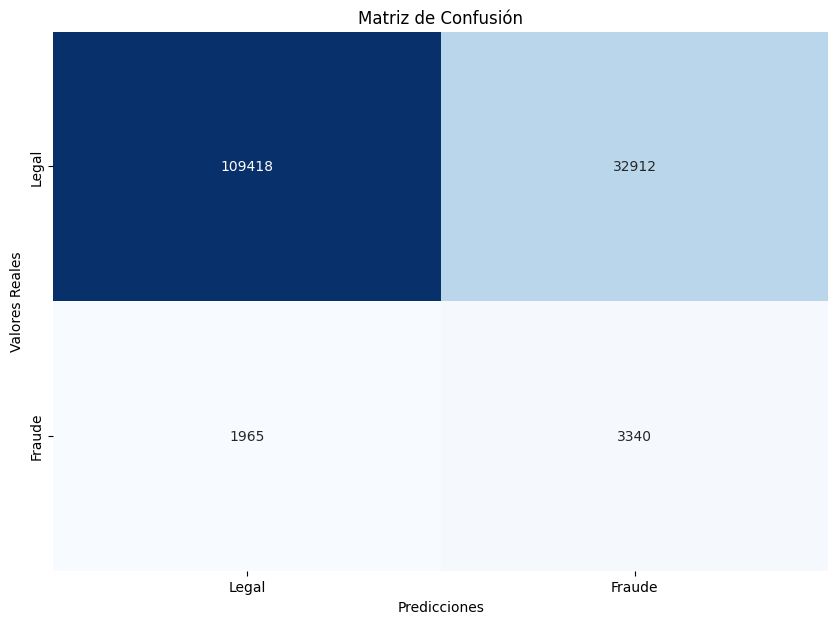

In [97]:
y_true = y_test
y_pred = y_pred_mlp
plot_confusion_matrix(y_true, y_pred, classes=['Legal', 'Fraude'])

### Curva ROC

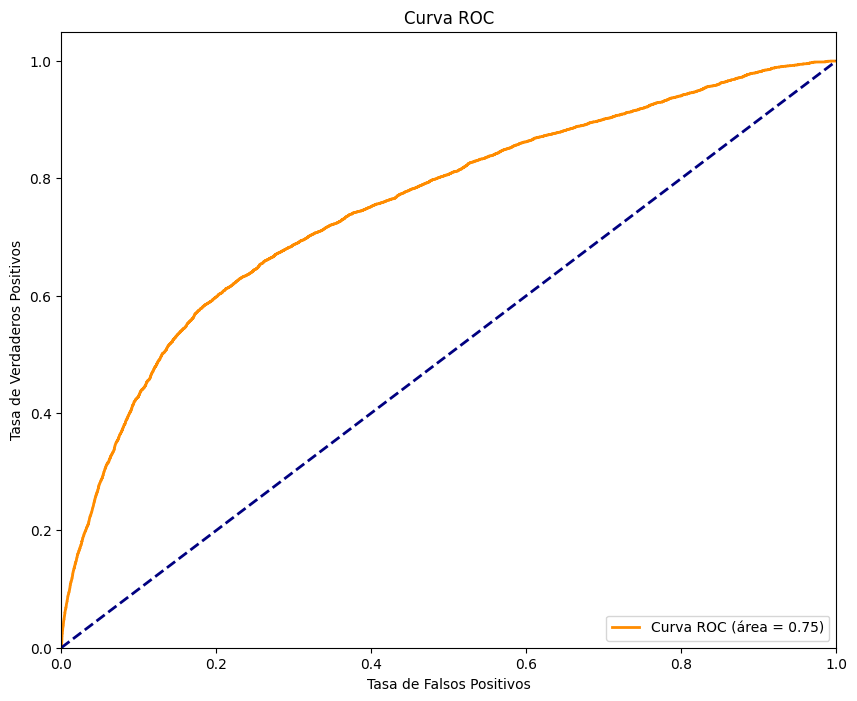

In [114]:
y_prob_mlp = grid_mlp_fraud.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Resultados

In [72]:
data = {
    'modelos': ['knn', 'naive bayes', 'decision tree', 'random forest', 'xgboost', 'svm', 'mlp'],
    'accuracy': [knn_accuracy, clf_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy, mlp_accuracy],
    'precision': [knn_precision, clf_precision, dt_precision, rf_precision, xgb_precision, svm_precision, mlp_precision],
    'recall': [knn_recall, clf_recall, dt_recall, rf_recall, xgb_recall, svm_recall, mlp_recall],
    'auc': [knn_auc, clf_auc, dt_auc, rf_auc, xgb_auc, svm_auc, mlp_auc],
    'f1': [knn_f1, clf_f1, dt_f1, rf_f1, xgb_f1, svm_f1, mlp_f1] 
}

# Crear el DataFrame
df = pd.DataFrame(data)
print(df)

         modelos  accuracy  precision    recall       auc        f1
0            knn  0.778515   0.109215  0.721583  0.751110  0.189716
1    naive bayes  0.774681   0.105553  0.705184  0.751110  0.183621
2  decision tree  0.774559   0.105432  0.704618  0.740892  0.183420
3  random forest  0.774681   0.105553  0.705184  0.741227  0.183621
4        xgboost  0.806794   0.116836  0.667295  0.739644  0.198854
5            svm  0.747899   0.080697  0.578888  0.666543  0.141648
6            mlp  0.763762   0.092133  0.629595  0.699179  0.160743


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

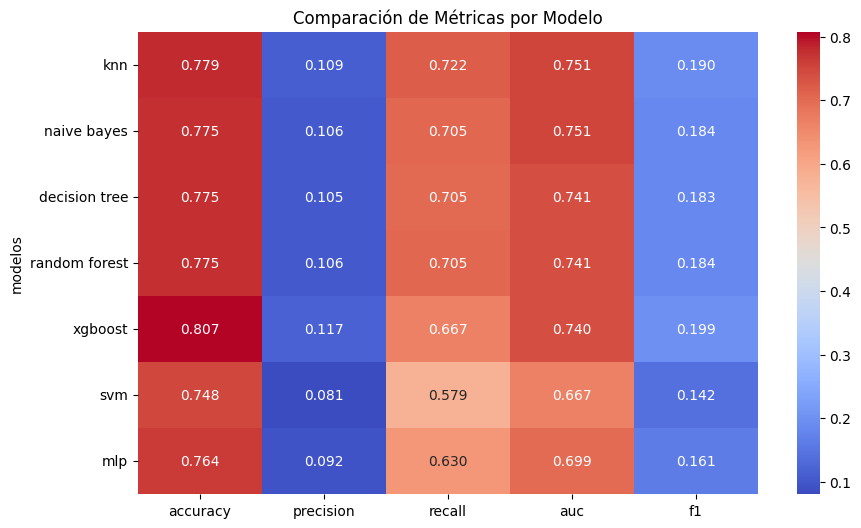

In [80]:

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Comparación de Métricas por Modelo')
plt.show()

Al comparar las metricas podemos ver que todos los modelos sufren de un exceso de falsos positivos.